In [0]:
## Representing text as numbers
# One-hot encodings -  is sparse
# Encode each word with a unique number
# - The integer-encoding is arbitrary (it does not capture any relationship between words)
# An integer-encoding can be challenging for a model to interpret
# Word embeddings - dense representation in which similar words have a similar encoding.
# Instead of specifying the values for the embedding manually, they are trainable parameters 

In [2]:
# Keras makes it easy to use word embeddings. - Embedding layer
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tf-nightly-2.0-preview
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# The Embedding layer takes at least two arguments:
# the number of possible words in the vocabulary, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 32.
embedding_layer = layers.Embedding(1000, 32)

     |████████████████████████████████| 88.0MB 42.6MB/s 
     |████████████████████████████████| 61kB 22.3MB/s 
     |████████████████████████████████| 430kB 46.2MB/s 
     |████████████████████████████████| 3.1MB 37.2MB/s 
ERROR: thinc 6.12.1 has requirement wrapt<1.11.0,>=1.10.0, but you'll have wrapt 1.11.1 which is incompatible.


In [0]:
# Embedding layer maps integer indices(specific word) -> dense vector(their embedding)
# Dimensionality is experiment like # of neurons in dense layer
# When create Embedding layer, weights for embedding are randomly initialized
# During training, gradually adjusted via backpropagation.
# Once trained, the learned word embeddings will roughly encode similarities between words 
# (as they were learned for the specific problem your model is trained on).

# As input, the Embedding layer takes a 2D tensor of integers, of shape (samples, sequence_length), where each entry is a sequence of integers.
# It can embed sequences of variable lengths. 
# You could feed into the embedding layer above batches with shapes (32, 10) (batch of 32 sequences of length 10) or (64, 15)
#  All sequences in a batch must have the same length, so sequences that are shorter than others should be padded with zeros, and sequences that are longer should be truncated.

# As output, the embedding layer returns a 3D floating point tensor, of shape (samples, sequence_length, embedding_dimensionality)
# Such a 3D tensor can then be processed by a RNN layer, or can simply be flattened or pooled and processed by a Dense layer

In [5]:
## Learning embeddings from scratch
vocab_size = 10000
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

17465344/17464789 [==============================] - 0s 0us/step


In [6]:
# As imported, the text of reviews is integer-encoded (each integer represents a specific word in a dictionary).
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [8]:
## Convert the integers back to words
# It may be useful to know how to convert integers back to text.

# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k: (v+3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [10]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [0]:
# Movie reviews can be different lengths. We will use the pad_sequences function to standardize the lengths of the reviews.
maxlen = 500

train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                       value=word_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=maxlen)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                      value=word_index['<PAD>'],
                                                      padding= 'post',
                                                      maxlen=maxlen)

In [13]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [16]:
## Create a simple model
# 1. Embedding layer - This layer takes the integer-encoded vocabulary and looks up the embedding vector for each word-index
# These vectors are learned as the model trains.
# The vectors add a dimension to the output array. The resulting dimensions are: (batch, sequence, embedding)`.

# 2. Next, a GlobalAveragePooling1D layer returns a fixed-length output vector for each example by averaging over the sequence dimension.
# This allows the model to handle input of variable length, in the simplest way possible.

# 3. This fixed-length output vector is piped through a fully-connected (Dense) layer with 16 hidden units.

# 4. The last layer is densely connected with a single output node. Using the sigmoid activation function, this value is a float between 0 and 1, representing a probability (or confidence level) that the review is positive.

embedding_dim = 16

model = keras.Sequential([
    layers.Embedding(vocab_size, embedding_dim, input_length=maxlen),
    layers.GlobalAveragePooling1D(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(train_data,
                    train_labels,
                    epochs=30,
                    batch_size=512,
                    validation_split=0.2)

W0528 06:30:45.302651 140632280487808 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 2s 88us/sample - loss: 0.6925 - accuracy: 0.5361 - val_loss: 0.6916 - val_accuracy: 0.6814
Epoch 2/30
20000/20000 [==============================] - 2s 77us/sample - loss: 0.6896 - accuracy: 0.5870 - val_loss: 0.6865 - val_accuracy: 0.6064
Epoch 3/30
20000/20000 [==============================] - 2s 76us/sample - loss: 0.6816 - accuracy: 0.7071 - val_loss: 0.6741 - val_accuracy: 0.7422
Epoch 4/30
20000/20000 [==============================] - 2s 75us/sample - loss: 0.6636 - accuracy: 0.7555 - val_loss: 0.6489 - val_accuracy: 0.7534
Epoch 5/30
20000/20000 [==============================] - 2s 76us/sample - loss: 0.6318 - accuracy: 0.7852 - val_loss: 0.6110 - val_accuracy: 0.7834
Epoch 6/30
20000/20000 [==============================] - 2s 77us/sample - loss: 0.5877 - accuracy: 0.8026 - val_loss: 0.5646 - val_accuracy: 0.7986
Epoch 7/30
20000/20000 [==============================] -

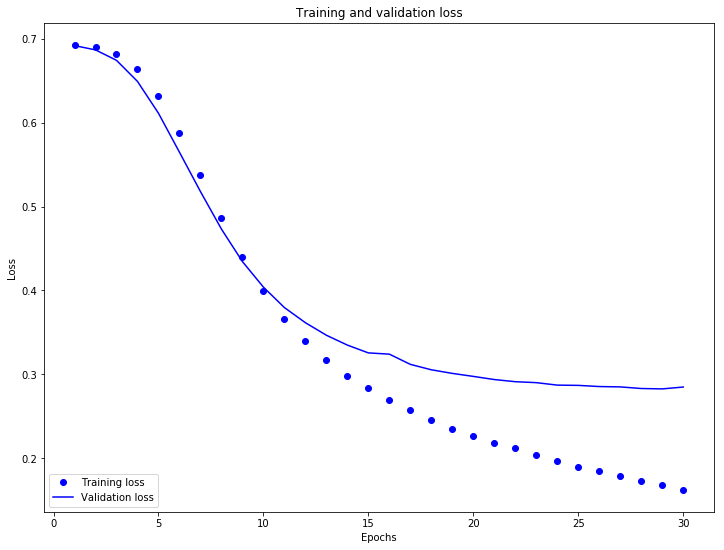

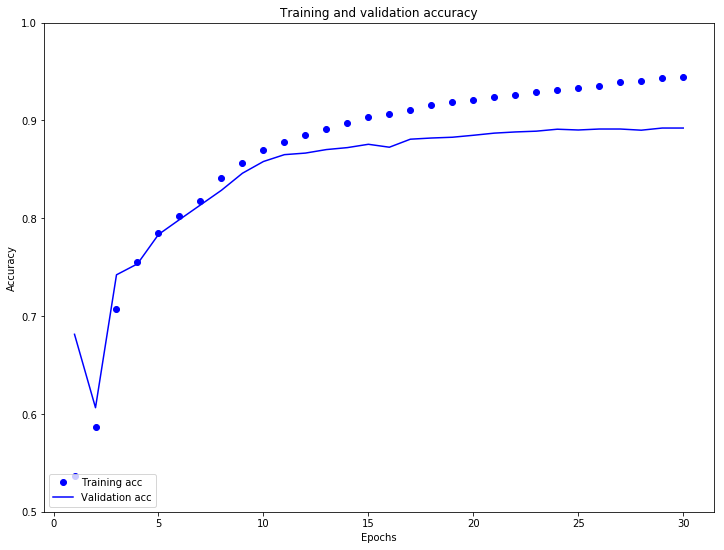

In [21]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='lower left')
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')
plt.ylim((0.5,1))
plt.show()

In [24]:
## Retrieve the learned embeddings
# This will be a matrix of shape (vocab_size,embedding-dimension).
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [0]:
# We will now write the weights to disk.
# To use the Embedding Projector, we will upload two files in tab separated format: a file of vectors (containing the embedding), and a file of meta data (containing the words).

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + '\n')
    out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')

out_v.close()
out_m.close()

In [0]:
# http://projector.tensorflow.org/